# LIBRERIAS Y DATASETS

## LIBRERIAS

In [115]:
import pandas as pd
import numpy as np
from os import listdir
import shutil
from os import remove

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

In [116]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

## CLIENTES  CSV

In [117]:
df = pd.read_csv('clientes.csv')
df = pd.DataFrame(df)

In [118]:
df.head(3)

,Unnamed: 0,Name,Status,Cliente,Entrenadores,Primera Entrevista (Calendly),OS,Cliente Desde,Nutricion,Nutricionista,Nutrición Desde,Meses Nutri,Edad,Objetivo,Dias/semana actual,Dias/semana Sono,Alimentacion,Fitness Band,user_id
0,0,Ana,Churned,NaN,NaN,NaN,iOS,9/17/2020,NaN,NaN,9/17/2020,8.7,26.0,Mejorar rendimiento en un deporte,5-6,5-6 días,5.0,No tengo,recgxlRBB2s1z9n3K
1,1,Borja,Churned,NaN,Oscar,NaN,iOS,9/17/2020,NaN,NaN,9/17/2020,8.7,29.0,Mejorar cardio y/o resistencia,1-2,2 días,4.0,Polar,recCjycZK9bi7Ccwt
2,2,Angel,Churned,checked,Oscar,NaN,iOS,9/22/2020,NaN,NaN,9/22/2020,8.5,20.0,Recuperarme de una lesión y/o reducir molestias,5-6,5-6 días,2.0,No tengo,recyvFsiSa7Cuy52q


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     79 non-null     int64  
 1   Name                           79 non-null     object 
 2   Status                         79 non-null     object 
 3   Cliente                        44 non-null     object 
 4   Entrenadores                   70 non-null     object 
 5   Primera Entrevista (Calendly)  37 non-null     object 
 6   OS                             12 non-null     object 
 7   Cliente Desde                  20 non-null     object 
 8   Nutricion                      4 non-null      object 
 9   Nutricionista                  5 non-null      object 
 10  Nutrición Desde                11 non-null     object 
 11  Meses Nutri                    11 non-null     float64
 12  Edad                           43 non-null     float

In [120]:
# Remove unnecesary columns 
df = df.drop(columns =[ 'Unnamed: 0', 'user_id','Cliente',
                                   'Dias/semana Sono', 'Dias/semana actual','Primera Entrevista (Calendly)'
                                   , 'OS', 'Nutricionista'])

In [121]:
#add sex column
women = [
    'Ana', 'Clara', 'Nona', 'Macarena', 'Magdalena', 'Elena', 'Maru',
    'Paulina', 'Carmen', 'Claudia', 'Itziar', 'Lola', 'Laura', 'Sonia',
    'Carla', 'Benxa', 'Isi', 'Gaby', 'Maribel', 'Estefania', 'Bilal', 'Maria',
    'Carolina', 'ElenaM', 'Pilar', 'MiriamG', 'Leticia Salmeron', 'fati',
    'Maria dolores Martinez neria', 'Layla', 'Toñi Avila', 'PaulaG', 'Alba',
    'Natalia ', 'Leidy', 'Esther', 'Matilde'
]

df['Sex'] = df['Name']

def sex(x):
    if x in women:
        x = 0
    else:
        x = 1
    return x
        
df['Sex'] = df['Name'].apply(sex)

In [122]:
df['Status'].unique()

array(['Churned', 'Usuario', 'Formulario', 'test', 'Out', 'Trial'],
      dtype=object)

In [123]:
#REMOVE TEST CLIENTS
df_clientes= df[(df['Status']!='test')&(df['Status']!='Trial')]
df_clientes

,Name,Status,Entrenadores,Cliente Desde,Nutricion,Nutrición Desde,Meses Nutri,Edad,Objetivo,Alimentacion,Fitness Band,Sex
0,Ana,Churned,NaN,9/17/2020,NaN,9/17/2020,8.7,26.0,Mejorar rendimiento en un deporte,5.0,No tengo,0
1,Borja,Churned,Oscar,9/17/2020,NaN,9/17/2020,8.7,29.0,Mejorar cardio y/o resistencia,4.0,Polar,1
2,Angel,Churned,Oscar,9/22/2020,NaN,9/22/2020,8.5,20.0,Recuperarme de una lesión y/o reducir molestias,2.0,No tengo,1
3,Jose,Usuario,Oscar,9/28/2020,NaN,9/28/2020,8.3,31.0,Ganar masa muscular,3.0,Fitbit,1
4,Yago,Churned,Oscar,10/29/2020,NaN,10/29/2020,7.3,27.0,Ganar masa muscular,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,JuanC,Usuario,Laura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
72,Esther,Out,Laura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
73,Oskar,Out,Oscar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
74,Matilde,Out,Laura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [124]:
df_clientes['Status'].unique()

array(['Churned', 'Usuario', 'Formulario', 'Out'], dtype=object)

# STATUS GENERAL

In [125]:
df_status = pd.DataFrame(df_clientes.groupby('Status').count())
df_status

,Name,Entrenadores,Cliente Desde,Nutricion,Nutrición Desde,Meses Nutri,Edad,Objetivo,Alimentacion,Fitness Band,Sex
Status,,,,,,,,,,,
Churned,17,16,11,2,6,6,14,15,3,3,17
Formulario,7,0,0,0,0,0,7,7,7,7,7
Out,31,30,2,0,1,1,15,15,0,0,31
Usuario,11,11,4,1,3,3,7,7,1,1,11


In [126]:
total_clientes = df_status['Name'].sum()

In [127]:
df_s  = pd.DataFrame(df_status['Name'])
df_s = df_s.rename(columns={'Name':'percent clientes'})

In [128]:
df_s= (df_s['percent clientes']*100/total_clientes).round(1)
df_s = df_s.reset_index()
df_s

,Status,percent clientes
0,Churned,25.8
1,Formulario,10.6
2,Out,47.0
3,Usuario,16.7


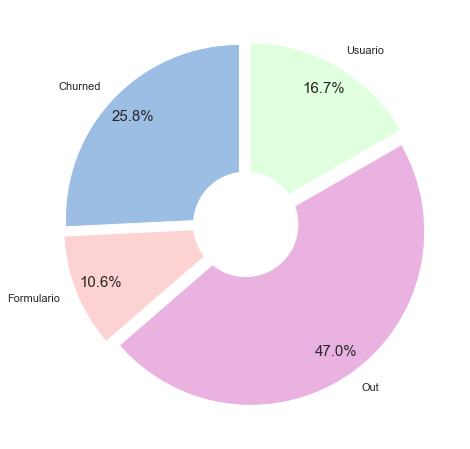

In [129]:
explode = (0.05,0.05,0.05,0.05)
patches, texts, autotexts = plt.pie(df_s['percent clientes'],
        labels=df_s['Status'],
        colors=['#9CBEE4', '#FDD2D2','#EAB2E1' , '#c9e6c9'],
        startangle=90, pctdistance=0.85, explode = explode,
        autopct="%.1f%%")

# add a circle at the center to transform it in a donut chart
my_circle = plt.Circle((0, 0), 0.3, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
p.set_size_inches(8, 8)

plt.savefig("statusgeneral.png")

plt.show()


# STATUS POR GÉNERO

In [130]:
df_status= df_clientes[['Status','Sex']]
df_status.head(5)

,Status,Sex
0,Churned,0
1,Churned,1
2,Churned,1
3,Usuario,1
4,Churned,1


In [131]:
df_status_sex = df_status.groupby('Status').count()
woman = df_status[df_status['Sex']==0].groupby('Status').count()
man = df_status[df_status['Sex']==1].groupby('Status').count()

In [132]:
df_status_sex['Woman'] = woman['Sex']
df_status_sex['Man'] = man['Sex']

In [133]:
df_status_sex

,Sex,Woman,Man
Status,,,
Churned,17,10,7
Formulario,7,1,6
Out,31,23,8
Usuario,11,4,7


In [134]:
w = list(df_status_sex['Woman'])
m = list(df_status_sex['Man'])
sizes_gender = []
for i in range(len(w)):
    sizes_gender.append(w[i])
    sizes_gender.append(m[i])

In [135]:
df_status_sex =df_status_sex.reset_index()

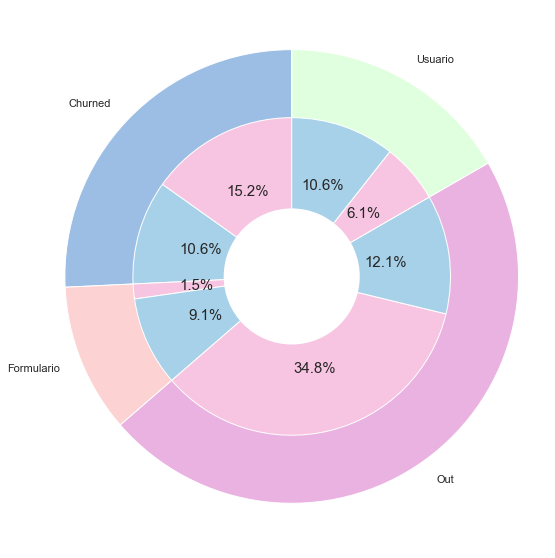

In [136]:
# Data to plot
labels = list(df_status_sex['Status'])
sizes =  list(df_status_sex['Sex'])
labels_gender = ['Woman','Man','Woman','Man','Woman','Man','Woman', 'Man']


colors = ['#9CBEE4', '#FDD2D2','#EAB2E1' , '#c9e6c9']
colors_gender = ['#F7C5E1','#A7D1E8','#F7C5E1','#A7D1E8', '#F7C5E1','#A7D1E8','#F7C5E1','#A7D1E8']
 
p1 = plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)

p2 = plt.pie(sizes_gender,colors=colors_gender,radius=0.7, startangle=90, autopct="%.1f%%", )

centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8, 8)

plt.axis('equal')
plt.tight_layout()
plt.savefig("statusgenero.png")
plt.show()


# PAGO APP POR GÉNERO DESPUÉS DE LA PRUEBA 

In [137]:
df_status_sex = df_status_sex.drop([1],axis=0)
display(df_status_sex) 

,Status,Sex,Woman,Man
0,Churned,17,10,7
2,Out,31,23,8
3,Usuario,11,4,7


In [138]:
app_pago = df_status_sex[(df_status_sex['Status']=='Churned')|(df_status_sex['Status']=='Usuario')].sum()

In [139]:
total_pago = app_pago['Sex'].sum()
woman_pago = app_pago['Woman'].sum()
man_pago = app_pago['Man'].sum()

In [140]:
wp = (woman_pago*100/(df_status_sex['Woman'].sum())).round(1)
mp = (man_pago*100/(df_status_sex['Man'].sum())).round(1)
print(wp, mp)

37.8 63.6


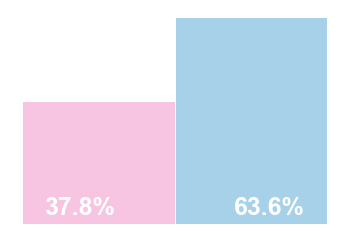

In [141]:
X = 2 
fig,a = plt.subplots() 
p1= a.bar(2 - 0.4, wp, color='#F7C5E1')
p1 = a.text(1+1 / 2, 2 + 1 * 1.01, str(wp) + '%', ha='center', weight='bold',size =25, color = 'white')
p2 = a.bar(2 + 0.4, mp, color='#A7D1E8')
p2 = a.text(2 + 1 / 2, 2 + 1 * 1.01, str(mp) + '%', ha='center', weight='bold', size =25, color = 'white')
a.xaxis.set_visible(False)
a.yaxis.set_visible(False)
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.spines['left'].set_visible(False)
a.spines['bottom'].set_visible(False)
plt.savefig("appgenero.png")
plt.show()

# PAGO APP POR EDAD

In [189]:
app_edad = df_clientes[['Status','Edad','Sex']]
app_edad.dropna(inplace= True)

<ipython-input-189-d3c2e0315cfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_edad.dropna(inplace= True)


In [190]:
app_edad.head(3)

,Status,Edad,Sex
0,Churned,26.0,0
1,Churned,29.0,1
2,Churned,20.0,1


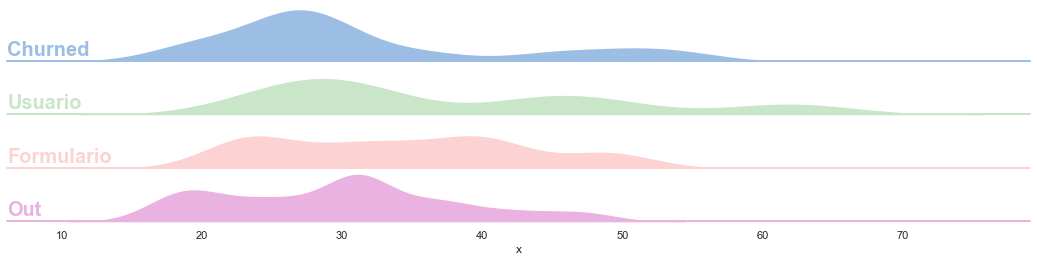

In [191]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Create the data
x = app_edad['Edad']
g = app_edad['Status']
df = pd.DataFrame(dict(x=x, g=g))


# Initialize the FacetGrid object

pal =  ['#9CBEE4', '#c9e6c9','#FDD2D2','#EAB2E1']    
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,fontsize=20,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.01)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);
plt.savefig("edadclientes.png")

In [192]:
woman = app_edad[app_edad['Sex']==0]
man = app_edad[app_edad['Sex']==1]

In [193]:
woman = woman.sort_values(by=['Status'])
man = man.sort_values(by=['Status'])

In [194]:
status=app_edad['Status'].unique()

/Users/cmg/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/cmg/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


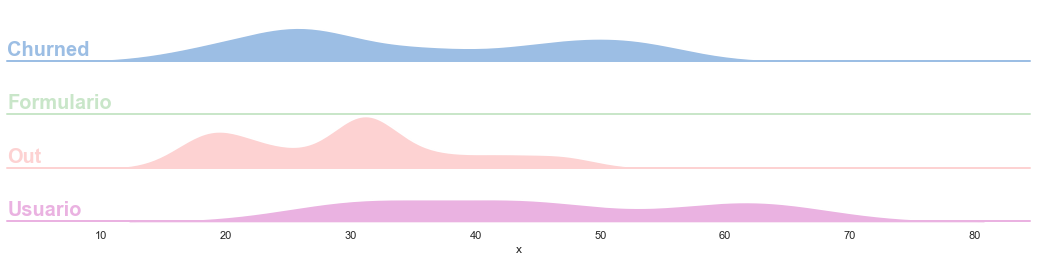

In [196]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Create the data
x = woman['Edad']
g = woman['Status']
df = pd.DataFrame(dict(x=x, g=g))


# Initialize the FacetGrid object

pal =  ['#9CBEE4', '#c9e6c9','#FDD2D2','#EAB2E1']    
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,fontsize=20,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.01)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);
plt.savefig("edadwoman.png")

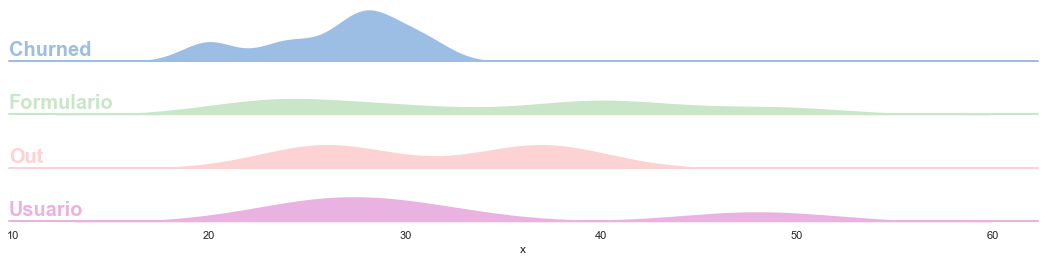

In [197]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Create the data
x = man['Edad']
g = man['Status']
df = pd.DataFrame(dict(x=x, g=g))


# Initialize the FacetGrid object

pal =  ['#9CBEE4', '#c9e6c9','#FDD2D2','#EAB2E1']    
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,fontsize=20,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.01)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True);
plt.savefig("edadman.png")

In [201]:
df_clientes_edad= df_clientes[['Objetivo','Edad','Sex']]

In [202]:
df_clientes_edad.dropna(inplace= True)

<ipython-input-202-9397164764c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes_edad.dropna(inplace= True)


In [203]:
df_clientes_edad['Edad'] = df_clientes_edad['Edad'].astype('int32')

<ipython-input-203-4ee13775bb3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes_edad['Edad'] = df_clientes_edad['Edad'].astype('int32')


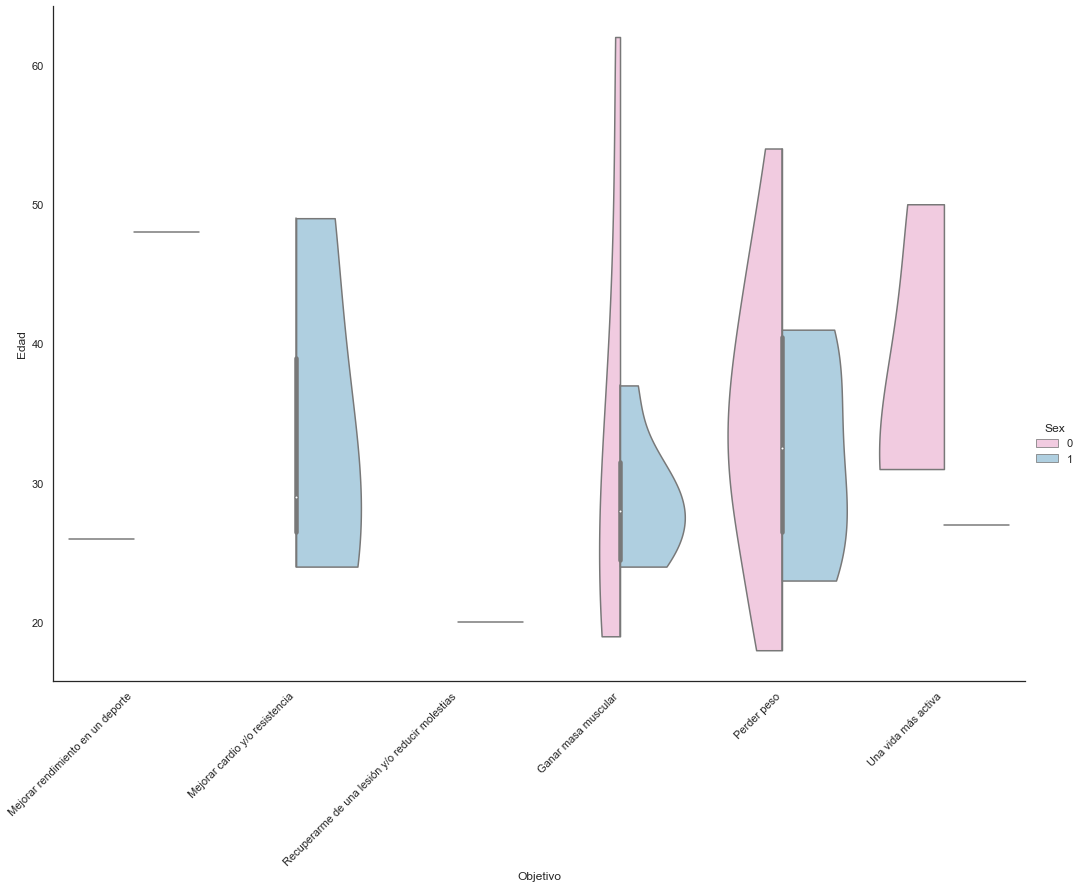

In [232]:
# Plot our violins.

sns.catplot(x="Objetivo",
            y="Edad",
            data=df_clientes_edad,
            kind="violin",
            hue="Sex",
            palette=sns.color_palette(['#F7C5E1','#A7D1E8']),
            split=True,
            height=10,
            aspect=11.7 / 8.27,
           cut=0)

# Rotate the x-axis labels and remove the plot border on the left.
plt.xticks(rotation=45, ha='right')
sns.despine(left=False)
plt.savefig("edadgenerogoals.png")

# ENTRENADORES

In [234]:
entrenadores = ['Javier','Laura','Miriam','Oscar']

In [235]:
df_clientes_entrendadores= df_clientes[['Sex','Entrenadores','Status']]
df_clientes_entrendadores.dropna(inplace = True)

<ipython-input-235-a229bcb80d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes_entrendadores.dropna(inplace = True)


In [236]:
w = df_clientes_entrendadores['Sex']==0
m = df_clientes_entrendadores['Sex']==1
c = df_clientes_entrendadores['Status']=='Churned'
o = df_clientes_entrendadores['Status']=='Out'
u = df_clientes_entrendadores['Status']=='Usuario'

In [237]:
w_c = df_clientes_entrendadores[c&w].sort_values(by=['Entrenadores'])
w_o = df_clientes_entrendadores[o&w].sort_values(by=['Entrenadores'])
w_u = df_clientes_entrendadores[u&w].sort_values(by=['Entrenadores'])

In [238]:
m_c = df_clientes_entrendadores[c&m].sort_values(by=['Entrenadores'])
m_o = df_clientes_entrendadores[o&m].sort_values(by=['Entrenadores'])
m_u = df_clientes_entrendadores[u&m].sort_values(by=['Entrenadores'])

In [239]:
def analisis_entrenadores(df):
    lista = []
    for i in entrenadores:
        df_s = df[df['Entrenadores']== i]
        num =df_s['Status'].count()
        lista.append(num)
    return lista

In [240]:
mc = analisis_entrenadores(m_c)
mo = analisis_entrenadores(m_o)
mu = analisis_entrenadores(m_u)

wc = analisis_entrenadores(w_c)
wo = analisis_entrenadores(w_o)
wu = analisis_entrenadores(w_u)


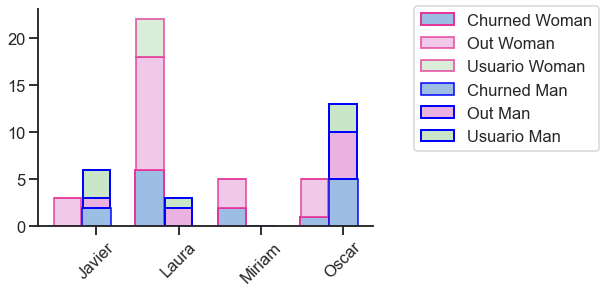

In [319]:
pos_mut_pcts = np.array(wc)
pos_cna_pcts = np.array(wo)
pos_both_pcts = np.array(wu)

neg_mut_pcts = np.array(mc)
neg_cna_pcts = np.array(mo)
neg_both_pcts = np.array(mu)
genes = entrenadores

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    
    # plot details 
    bar_width = 0.35
    epsilon = .015
    line_width = 2
    opacity = 0.7
    pos_bar_positions = np.arange(len(pos_mut_pcts))
    neg_bar_positions = pos_bar_positions + bar_width

    # make bar plots
    hpv_pos_mut_bar = plt.bar(pos_bar_positions, pos_mut_pcts, bar_width,
                              color='#9CBEE4',
                              edgecolor='#E43698',
                              #hatch='//',
                              linewidth=line_width,
                              label='Churned Woman')
    hpv_pos_cna_bar = plt.bar(pos_bar_positions, pos_cna_pcts, bar_width-epsilon,
                              bottom=pos_mut_pcts,
                              alpha=opacity,
                              color='#EAB2E1',
                              edgecolor='#E43698',
                              #hatch='//',
                              linewidth=line_width,
                              label='Out Woman')
    hpv_pos_both_bar = plt.bar(pos_bar_positions, pos_both_pcts, bar_width-epsilon,
                               bottom=pos_cna_pcts+pos_mut_pcts,
                               alpha=opacity,
                              color='#c9e6c9',
                               edgecolor='#E43698',
                              #hatch='//',
                              linewidth=line_width,
                               label='Usuario Woman')
    hpv_neg_mut_bar = plt.bar(neg_bar_positions, neg_mut_pcts, bar_width,
                             color='#9CBEE4',
                              
                              edgecolor='blue',
                              
                              label='Churned Man')
    hpv_neg_cna_bar = plt.bar(neg_bar_positions, neg_cna_pcts, bar_width-epsilon,
                              bottom=neg_mut_pcts,
                              color='#EAB2E1',
                              edgecolor='blue',
                              linewidth=line_width,
                              label='Out Man')
    hpv_neg_both_bar = plt.bar(neg_bar_positions, neg_both_pcts, bar_width-epsilon,
                               bottom=neg_cna_pcts+neg_mut_pcts,
                               color='#c9e6c9',
                               edgecolor='blue',
                               linewidth=line_width,
                               label='Usuario Man')
    plt.xticks(neg_bar_positions, entrenadores , rotation=45)
    legend = plt.legend(bbox_to_anchor=(1.1, 1.05))  
    legend.get_frame().set_facecolor('white')
    sns.despine() 
    plt.savefig("coachstatus.png")
    plt.show() 
   

# WORKOUTS CSV

In [276]:
df_workouts = pd.read_csv('workouts.csv')
df_workouts = pd.DataFrame(df_workouts)

In [277]:
df_workouts.head(3)

,workoutId,name,coach,type,zonas,duration,date,Sync,Feedback,completed
0,Macarena22,FitCircuit,Miriam,Circuit Training,Full Body,60.0,12/11/2019,https://airtable.com/tblnhWsiv31HIswwM/recIn69...,NaN,NaN
1,Angel11,Fuerza Bienvenida,Oscar,Fuerza,Full Body,75.0,9/28/2020,https://airtable.com/tblnhWsiv31HIswwM/recJqqs...,8.0,checked
2,Angel12,Fuerza Calentamiento,Oscar,Fuerza,NaN,75.0,9/29/2020,https://airtable.com/tblnhWsiv31HIswwM/recbLRJ...,NaN,checked


In [278]:
def floatnum(x):
    if type(x) == float:
        x = True
    else:
        x = False
    return x


def delete_num(x):
    for number in range(10):
        number = str(number)
        x = x.replace(number, '')
    return x


df_workouts['user'] = df_workouts['workoutId'].apply(floatnum)
df_workouts = df_workouts[df_workouts['user'] == False]
df_workouts['user'] = df_workouts['workoutId'].apply(delete_num)

In [279]:
df_workouts

,workoutId,name,coach,type,zonas,duration,date,Sync,Feedback,completed,user
0,Macarena22,FitCircuit,Miriam,Circuit Training,Full Body,60.0,12/11/2019,https://airtable.com/tblnhWsiv31HIswwM/recIn69...,NaN,NaN,Macarena
1,Angel11,Fuerza Bienvenida,Oscar,Fuerza,Full Body,75.0,9/28/2020,https://airtable.com/tblnhWsiv31HIswwM/recJqqs...,8.0,checked,Angel
2,Angel12,Fuerza Calentamiento,Oscar,Fuerza,NaN,75.0,9/29/2020,https://airtable.com/tblnhWsiv31HIswwM/recbLRJ...,NaN,checked,Angel
3,Angel13,Fuerza Calentamiento 2,Oscar,Fuerza,NaN,75.0,9/30/2020,https://airtable.com/tblnhWsiv31HIswwM/rec2b8W...,NaN,checked,Angel
4,Borja11,Primera Carrera,Oscar,Running,"Piernas,Core",60.0,10/1/2020,https://airtable.com/tblnhWsiv31HIswwM/recm6Jm...,NaN,checked,Borja
...,...,...,...,...,...,...,...,...,...,...,...
1774,JuanC52,GAP!,Laura,Circuit Training,Full Body,45.0,6/2/2021,https://airtable.com/tblnhWsiv31HIswwM/recwwP0...,NaN,NaN,JuanC
1775,JuanC53,Quemador!,Laura,Circuit Training,Full Body,45.0,6/4/2021,https://airtable.com/tblnhWsiv31HIswwM/recr6Hv...,NaN,NaN,JuanC
1776,Elena101,Full body!,Laura,Circuit Training,Full Body,30.0,5/31/2021,https://airtable.com/tblnhWsiv31HIswwM/recylHu...,NaN,NaN,Elena
1777,Elena102,GAP!,Laura,Circuit Training,Full Body,30.0,6/2/2021,https://airtable.com/tblnhWsiv31HIswwM/recWV6b...,NaN,NaN,Elena


In [280]:
#remove unnecesary colummns 
df_workouts = df_workouts.drop(columns =['Sync','workoutId'])

In [281]:
test = df_clientes[(df_clientes['Status']!='test')&(df_clientes['Status']!='Trial')&(df_clientes['Status']!='Formulario')]
test_lista = list(test['Name'])

In [282]:
test_lista

['Ana',
 'Borja',
 'Angel',
 'Jose',
 'Yago',
 'Clara',
 'Ignacio',
 'Nona',
 'Macarena',
 'Magdalena',
 'Elena',
 'Maru',
 'Santiago',
 'Juan',
 'Paulina',
 'Carmen',
 'Claudia',
 'Itziar',
 'Gui',
 'Lola',
 'Jacobo',
 'Erik',
 'JuanLuis',
 'Laura',
 'Sonia',
 'Carla',
 'Alberto',
 'Benxa',
 'Isi',
 'Gaby',
 'Maribel',
 'Estefania',
 'Bilal',
 'Maria',
 'Victor',
 'Carolina',
 'ElenaM',
 'Pilar',
 'MiriamG',
 'Leticia Salmeron',
 'fati',
 'Maria dolores Martinez neria',
 'Layla',
 'Toñi Avila',
 'AlfonsoP',
 'PaulaG',
 'Cristian',
 'JaimeG',
 'Jeremmy',
 'JoseLuis ',
 'Alba',
 'Natalia ',
 'Leidy',
 'Ian Bermejo ',
 'JuanC',
 'Esther',
 'Oskar',
 'Matilde',
 'JoseM']

In [283]:
def remove_test(x):
    if not x in test_lista:
        x = np.NaN
    return x

In [284]:
df_workouts['user'] = df_workouts['user'].apply(remove_test)
df_workouts= df_workouts[df_workouts['user'].notna()]

In [285]:
df_workouts['user'].unique()

array(['Macarena', 'Angel', 'Borja', 'Jose', 'Yago', 'Magdalena', 'Nona',
       'Ignacio', 'Elena', 'Maru', 'Santiago', 'Juan', 'Paulina',
       'Carmen', 'Claudia', 'Itziar', 'Jacobo', 'Lola', 'JuanLuis', 'Gui',
       'Erik', 'Laura', 'Sonia', 'Alberto', 'AlfonsoP', 'JoseLuis ',
       'Gaby', 'Maria', 'Estefania', 'Maribel', 'Benxa', 'Isi', 'Victor',
       'ElenaM', 'Carolina', 'Pilar', 'fati', 'PaulaG',
       'Leticia Salmeron', 'Cristian', 'Layla', 'JaimeG', 'Jeremmy',
       'Leidy', 'Oskar', 'JuanC', 'Alba'], dtype=object)

In [286]:
df_workouts

,name,coach,type,zonas,duration,date,Feedback,completed,user
0,FitCircuit,Miriam,Circuit Training,Full Body,60.0,12/11/2019,NaN,NaN,Macarena
1,Fuerza Bienvenida,Oscar,Fuerza,Full Body,75.0,9/28/2020,8.0,checked,Angel
2,Fuerza Calentamiento,Oscar,Fuerza,NaN,75.0,9/29/2020,NaN,checked,Angel
3,Fuerza Calentamiento 2,Oscar,Fuerza,NaN,75.0,9/30/2020,NaN,checked,Angel
4,Primera Carrera,Oscar,Running,"Piernas,Core",60.0,10/1/2020,NaN,checked,Borja
...,...,...,...,...,...,...,...,...,...
1774,GAP!,Laura,Circuit Training,Full Body,45.0,6/2/2021,NaN,NaN,JuanC
1775,Quemador!,Laura,Circuit Training,Full Body,45.0,6/4/2021,NaN,NaN,JuanC
1776,Full body!,Laura,Circuit Training,Full Body,30.0,5/31/2021,NaN,NaN,Elena
1777,GAP!,Laura,Circuit Training,Full Body,30.0,6/2/2021,NaN,NaN,Elena


## CHECK WORKOUT

In [287]:
df_workouts['completed'] = df_workouts['completed'].fillna('not checked')

In [288]:
df_check = df_workouts

In [289]:
df_check.head(3)

,name,coach,type,zonas,duration,date,Feedback,completed,user
0,FitCircuit,Miriam,Circuit Training,Full Body,60.0,12/11/2019,NaN,not checked,Macarena
1,Fuerza Bienvenida,Oscar,Fuerza,Full Body,75.0,9/28/2020,8.0,checked,Angel
2,Fuerza Calentamiento,Oscar,Fuerza,NaN,75.0,9/29/2020,NaN,checked,Angel


### CHECK WORKOUT GENERAL

In [290]:
df_check = df_workouts[['user','completed', 'Feedback']]

In [291]:
df_check = df_check.groupby('completed').count()

In [292]:
df_check= df_check.reset_index()
df_check

,completed,user,Feedback
0,checked,577,506
1,not checked,912,0


In [293]:
total = df_check['user'].sum()
total

1489

In [294]:
df_check_c = (df_check.iloc[0,1]*100/total).round(1)
df_check_nc = (df_check.iloc[1,1]*100/total).round(1)

In [295]:
df_check_c

38.8

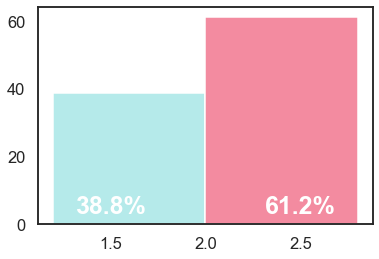

In [299]:
X = 2
plt.bar(2 - 0.4, df_check_c , color='#B5EAEA')
plt.text(1+1 / 2, 2 + 1 * 1.01, str(df_check_c) + '%', ha='center', weight='bold',size =25, color = 'white')
plt.bar(2 + 0.4, df_check_nc, color='#F38BA0')
plt.text(2 + 1 / 2, 2 + 1 * 1.01, str(df_check_nc) + '%', ha='center', weight='bold', size =25, color = 'white')
plt.savefig("terminanwo.png")
plt.show()

In [300]:
df_check = df_workouts[['coach','completed']]
df_checkt = df_check.groupby('coach').count()
df_checkt = df_checkt.rename(columns={'completed':'total wo'})

In [301]:
df_check_c = df_check[df_check['completed']=='checked']
df_check_c = df_check_c.groupby('coach').count()
df_check_c = df_check_c.rename(columns={'completed':'wo completed'})

In [302]:
df_check_ic = df_check[df_check['completed']=='not checked']
df_check_ic = df_check_ic.groupby('coach').count()
df_check_ic = df_check_ic.rename(columns={'completed':'wo not completed'})

In [303]:
df_checkt['wo completed']= df_check_c['wo completed']
df_checkt['wo not completed']= df_check_ic['wo not completed']
df_checkt

,total wo,wo completed,wo not completed
coach,,,
Javier,171,86,85
Ken,2,1,1
Laura,268,102,166
Miriam,272,107,165
Oscar,776,281,495


In [304]:
df_checkt['wo completed']= df_checkt.apply(lambda x: ((x['wo completed']*100)/(x['total wo'])).round(1), axis=1)
df_checkt['wo not completed']= df_checkt.apply(lambda x: (x['wo not completed']*100/x['total wo']).round(1), axis = 1)

In [305]:
df_checkt.drop(index ='Ken', inplace = True)


In [306]:
df_checkt

,total wo,wo completed,wo not completed
coach,,,
Javier,171,50.3,49.7
Laura,268,38.1,61.9
Miriam,272,39.3,60.7
Oscar,776,36.2,63.8


In [307]:
df_clientes

,Name,Status,Entrenadores,Cliente Desde,Nutricion,Nutrición Desde,Meses Nutri,Edad,Objetivo,Alimentacion,Fitness Band,Sex
0,Ana,Churned,NaN,9/17/2020,NaN,9/17/2020,8.7,26.0,Mejorar rendimiento en un deporte,5.0,No tengo,0
1,Borja,Churned,Oscar,9/17/2020,NaN,9/17/2020,8.7,29.0,Mejorar cardio y/o resistencia,4.0,Polar,1
2,Angel,Churned,Oscar,9/22/2020,NaN,9/22/2020,8.5,20.0,Recuperarme de una lesión y/o reducir molestias,2.0,No tengo,1
3,Jose,Usuario,Oscar,9/28/2020,NaN,9/28/2020,8.3,31.0,Ganar masa muscular,3.0,Fitbit,1
4,Yago,Churned,Oscar,10/29/2020,NaN,10/29/2020,7.3,27.0,Ganar masa muscular,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,JuanC,Usuario,Laura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
72,Esther,Out,Laura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
73,Oskar,Out,Oscar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
74,Matilde,Out,Laura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [308]:
client_coach = (df_clientes[df_clientes['Status']!='Formulario']).groupby('Entrenadores').count()
status_coach_in = (df_clientes[(df_clientes['Status']=='Churned')|
                               (df_clientes['Status']=='Usuario')]).groupby('Entrenadores').count()
status_coach_out = (df_clientes[df_clientes['Status']=='Out']).groupby('Entrenadores').count()

In [309]:
df_checkt['n clients']= client_coach['Name']

In [310]:
df_checkt = df_checkt.reset_index()

In [311]:
df_checkt['wo completed']= df_checkt.apply(lambda x: ((x['wo completed']*x['n clients'])/100),
                                           axis=1)
df_checkt['wo not completed']= df_checkt.apply(lambda x: ((x['wo not completed']*x['n clients'])/100), 
                                               axis = 1)

In [323]:
df_checkt = df_checkt.round(1)
df_checkt .set_index('coach',inplace=True)
df_checkt 

,total wo,wo completed,wo not completed,n clients
coach,,,,
Javier,171,4.5,4.5,9
Laura,268,9.5,15.5,25
Miriam,272,2.0,3.0,5
Oscar,776,6.5,11.5,18


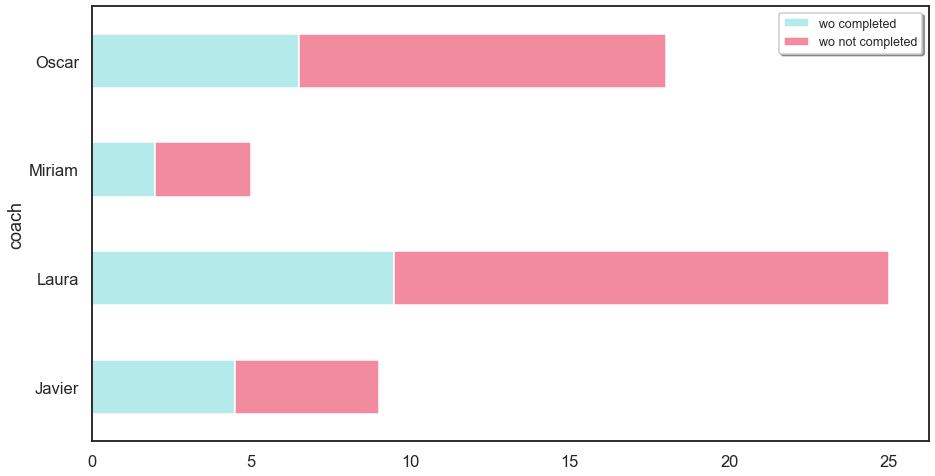

In [324]:
df = df_checkt [['wo completed', 'wo not completed']]
ax = df.plot.barh(stacked=True, color=['#B5EAEA','#F38BA0']);

ax.figure.set_size_inches(15,8)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-small')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('white')

In [327]:
import plotly.express as px
import squarify

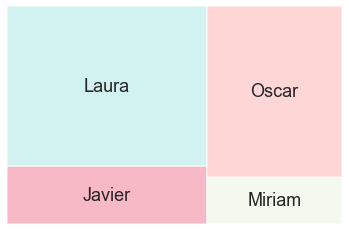

In [334]:
squarify.plot(sizes=df_checkt['n clients'],
              label=df_checkt.index,
              alpha=0.6,
              color=['#F38BA0','#B5EAEA','#EDF6E5', '#FFBCBC']
             )
plt.axis('off')
plt.show()